# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
warnings.filterwarnings('ignore')
np.random.seed(42)


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


100%|██████████| 100/100 [00:00<00:00, 3789.27it/s]

Final training loss:  0.017143643532923816


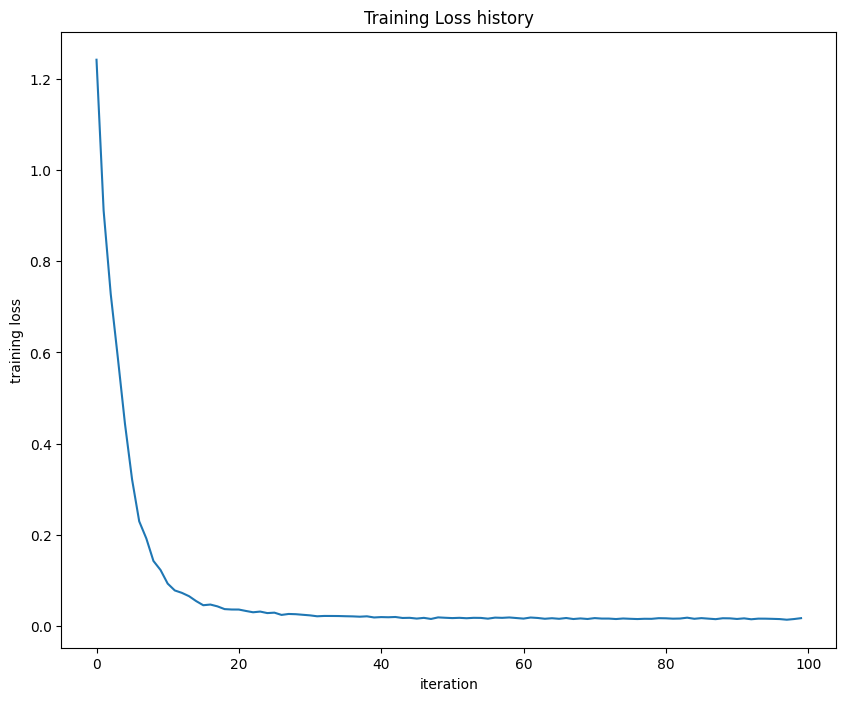

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [10]:
cifar10 = tf.keras.datasets.cifar10

In [11]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [12]:
num_train = 49000
num_val = 1000
num_test = 9000
num_dev = 1000

nn_X_train = X_train[range(num_train)]
nn_y_train = y_train[range(num_train)]

nn_X_val = X_train[range(num_train, num_train + num_val)]
nn_y_val = y_train[range(num_train, num_train + num_val)]

nn_X_test = X_test[range(num_test)]
nn_y_test = y_test[range(num_test)]

nn_X_dev = X_test[range(num_test, num_test + num_val)]
nn_y_dev = y_test[range(num_test, num_test + num_val)]
nn_X_train = np.reshape(nn_X_train, (nn_X_train.shape[0], -1)).astype(np.float64)
nn_y_train = np.reshape(nn_y_train, (nn_y_train.shape[0],))

nn_X_val = np.reshape(nn_X_val, (nn_X_val.shape[0], -1)).astype(np.float64)
nn_y_val = np.reshape(nn_y_val, (nn_y_val.shape[0],))

nn_X_test = np.reshape(nn_X_test, (nn_X_test.shape[0], -1)).astype(np.float64)
nn_y_test = np.reshape(nn_y_test, (nn_y_test.shape[0],))

nn_X_dev = np.reshape(nn_X_dev, (nn_X_dev.shape[0], -1)).astype(np.float64)
nn_y_dev = np.reshape(nn_y_dev, (nn_y_dev.shape[0],))
print(f"Тренировочная выборка: X={nn_X_train.shape}, y={nn_y_train.shape}")
print(f"Валидационная выборка: X={nn_X_val.shape}, y={nn_y_val.shape}")
print(f"Тестовая выборка: X={nn_X_test.shape}, y={nn_y_test.shape}")

Тренировочная выборка: X=(49000, 3072), y=(49000,)
Валидационная выборка: X=(1000, 3072), y=(1000,)
Тестовая выборка: X=(9000, 3072), y=(9000,)


Параметры обучения:

* *X_train, y_train* - тренировочный набор данных
* *X_val, y_val* - проверочный набор данных для настройки параметров обучения
* *num_iters* - количество итераций (эпох) обучения
* *batch_size* - размер батча (подмножество из обучающего набора) для обучения
* *learning_rate* - параметр, указывающий на скорость обучения
* *learning_rate_decay* - параметр, уменьшающий скорость обучения после каждой эпохи
* *reg* - параметр регуляризации для настройки весов
* *verbose* - для вывода информации об обучении

In [13]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(
    nn_X_train,
    nn_y_train,
    nn_X_val,
    nn_y_val,
    num_iters=1000,
    batch_size=200,
    learning_rate=1e-4,
    learning_rate_decay=0.95,
    reg=0.25,
    verbose=True,
)

val_acc = (net.predict(nn_X_val) == nn_y_val).mean()
print('Validation accuracy: ', val_acc)

  1%|          | 9/1000 [00:00<00:11, 87.95it/s]

iteration 0 / 1000: loss 2.302799


 12%|█▏        | 119/1000 [00:01<00:07, 114.94it/s]

iteration 100 / 1000: loss 2.301457


 22%|██▏       | 224/1000 [00:02<00:07, 101.84it/s]

iteration 200 / 1000: loss 2.252361


 31%|███       | 306/1000 [00:02<00:06, 100.21it/s]

iteration 300 / 1000: loss 2.160250


 42%|████▏     | 416/1000 [00:04<00:06, 88.52it/s] 

iteration 400 / 1000: loss 2.143100


 51%|█████     | 508/1000 [00:05<00:05, 92.38it/s] 

iteration 500 / 1000: loss 1.985403


 61%|██████▏   | 614/1000 [00:05<00:03, 116.28it/s]

iteration 600 / 1000: loss 2.049918


 71%|███████   | 709/1000 [00:06<00:02, 123.15it/s]

iteration 700 / 1000: loss 1.965823


 82%|████████▏ | 819/1000 [00:07<00:01, 124.45it/s]

iteration 800 / 1000: loss 2.138782


 90%|█████████ | 903/1000 [00:08<00:00, 119.01it/s]

iteration 900 / 1000: loss 1.952218


100%|██████████| 1000/1000 [00:09<00:00, 107.40it/s]


Validation accuracy:  0.305


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

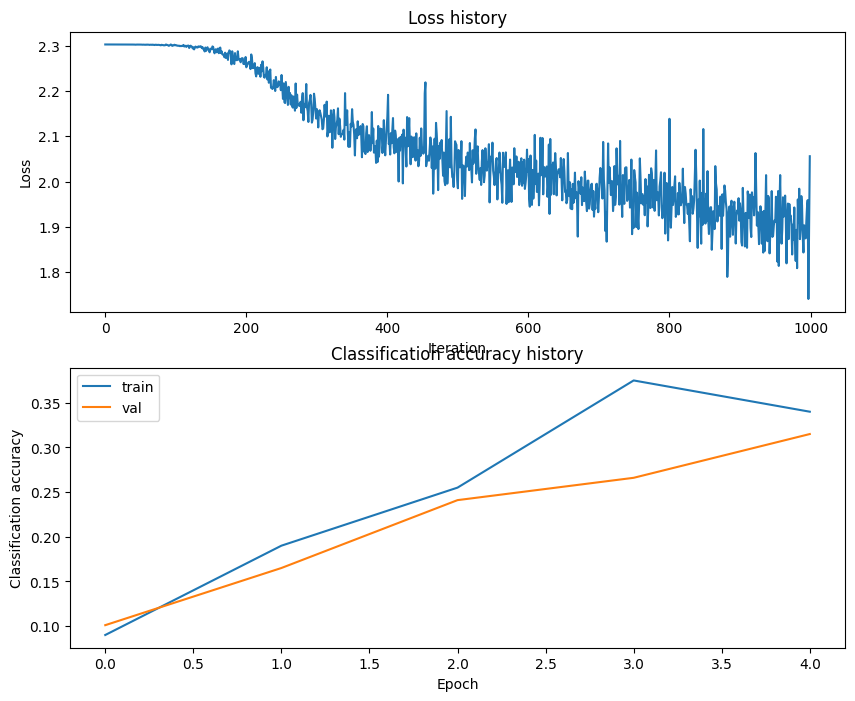

In [14]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

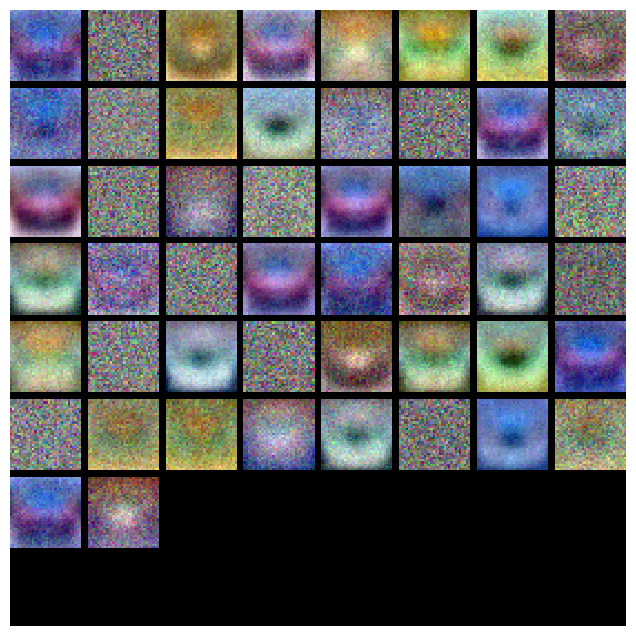

In [15]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

__Выводы__:

1. Была реализована двуслойная полносвязная нейронная сеть и алгоритм ее обучения.
2. С увеличением количества эпох в обучении нейронной сети уменьшается ошибка на проверочных данных. Однако при определенной эпохе может начаться переобучение.